In [1]:
# Importing the libraries
import pandas as pd

In [2]:
# Load the dataset
fish=pd.read_csv('Fish.csv')

In [3]:
# view the top 5 rows of the dataset
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
# Check the null values 
fish.isna().sum()        # isnull() and isna() both are same isna() is alias of isnull()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
fish.shape

(159, 7)

In [8]:
fish.isnull().value_counts()

Species  Weight  Length1  Length2  Length3  Height  Width
False    False   False    False    False    False   False    159
dtype: int64

In [9]:
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [10]:
fish[fish['Species']=='Pike'].max()

Species      Pike
Weight     1650.0
Length1      59.0
Length2      63.4
Length3      68.0
Height     10.812
Width        7.48
dtype: object

In [11]:
fish['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [12]:
fish[fish['Species']=='Whitefish'].shape

(6, 7)

{'whiskers': [<matplotlib.lines.Line2D at 0x257651aad90>,
 'caps': [<matplotlib.lines.Line2D at 0x257651c8370>,
 'boxes': [<matplotlib.lines.Line2D at 0x257651aaac0>],
 'medians': [<matplotlib.lines.Line2D at 0x257651c8910>],
 'fliers': [<matplotlib.lines.Line2D at 0x257651c8be0>],
 'means': []}

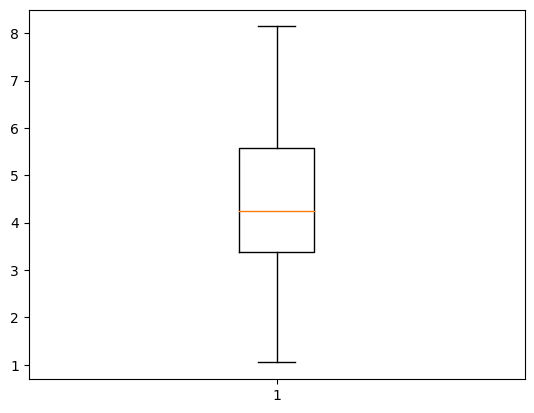

In [13]:
# for visualization
import matplotlib.pyplot as plt
# to check the outliers
plt.boxplot(fish['Width'])

{'whiskers': [<matplotlib.lines.Line2D at 0x257651f4a30>,
 'caps': [<matplotlib.lines.Line2D at 0x257651f4fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x257651f4760>],
 'medians': [<matplotlib.lines.Line2D at 0x257652045b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25765204880>],
 'means': []}

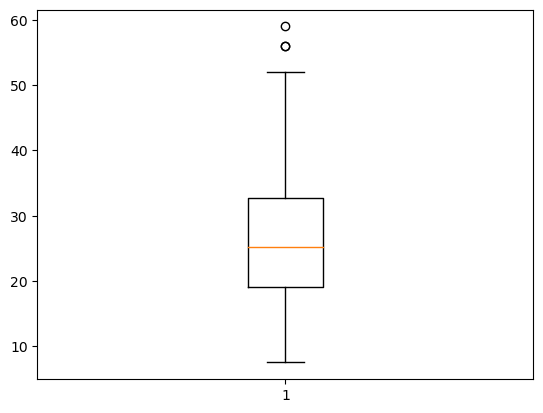

In [14]:
plt.boxplot(fish['Length1'])

In [15]:
data=fish['Species'].value_counts()

In [16]:
data['Perch']/(sum(data[:]))

0.3522012578616352

In [17]:
import seaborn as sns

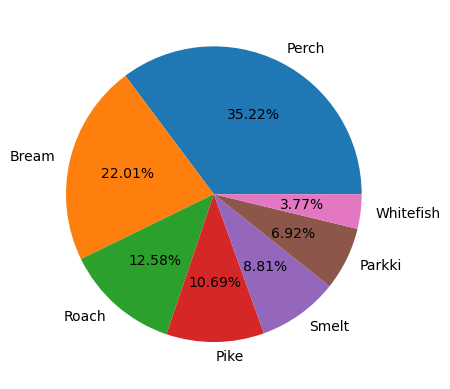

In [18]:
plt.pie(data.values, labels=data.index, autopct='%1.2f%%')
plt.show()

In [19]:
fish.groupby('Species')['Height'].mean()

Species
Bream        15.183211
Parkki        8.962427
Perch         7.861870
Pike          7.713771
Roach         6.694795
Smelt         2.209371
Whitefish    10.027167
Name: Height, dtype: float64

In [20]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [21]:
# Logistic Regression 
# Split the dataset into training and testing sets
X = fish.drop(['Species'], axis=1)
y = fish['Species']

In [23]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

In [24]:
# Create a logistic regression model and train it on the training data
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.725
